# Beginning Tasks: Diagnostics

# Preparations

# Final Mission: Going to Mars!

In order to get to Mars, we need to figure out how to leave Earth's orbit and arrive at Mars' orbit. Let's first do some trajectory planning.

### Part 1: Our Path To Mars

**Run the code below to plot our ship's trajectory to Mars' orbit.**

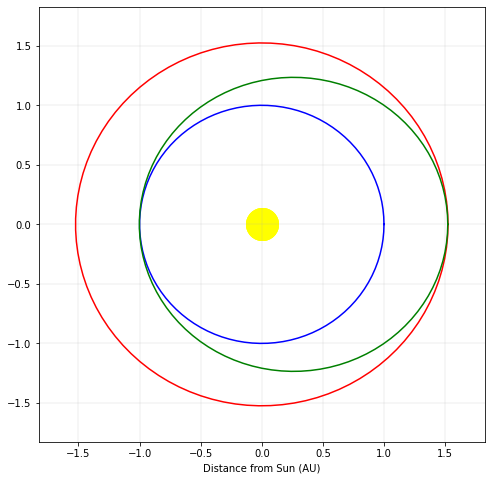

In [ ]:
def get_ellipse(major, e=0):
    theta = np.linspace(0, 2*np.pi, 100)      
    focal = major*e                               
    minor = math.sqrt((major**2) - (focal**2))            
    x = major*np.cos(theta)
    y = minor*np.sin(theta)
    return x+focal, y

def plot_orbit(major, e, color, ax):
    x, y = get_ellipse(major, e)    
    ax.grid(True, linewidth=0.2)
    ax.scatter(0, 0, color='yellow', s=2**10)
    ax.plot(x, y, color=color)
    ax.set_xlabel('Distance from Sun (AU)')
    ax.set_xlim(-1.2*np.max(x), 1.2*np.max(x))
    ax.set_ylim(-1.2*np.max(x), 1.2*np.max(x))

fig, ax = plt.subplots(figsize=[8,8])

plot_orbit(major=1, e=0, color="blue", ax=ax) #earth
plot_orbit(major=1.524, e=0, color="red", ax=ax) #mars

def plot_trajectory():
    R_Mars = 1.524
    R_Earth = 1

    a = (R_Mars + R_Earth)/2
    focus = 0.26
    eccentricity = focus/a
    
    return a, eccentricity

a, eccentricity = plot_trajectory()

plot_orbit(major=a, e=eccentricity, color="green", ax=ax)

**Advanced: consider the "plot_trajectory" function. This is a function that allows us to draw the ellipse of our trajectory by determining the focal length and semi-major axis length. Can you figure out how we can find the focal length and semi-major axis length of the new ellipse, knowing what we already know about Earth's and Mars' orbits?**

From our trajectory plan above, we can see that our rocket will start in Earth's orbit, exit Earth's orbit, reach Mars' orbit and remain in that orbit. This path follows an elliptical shape - it is called a "Hohmann Transfer Orbit".

The drawing below illustrates this trajectory:


Now, let's figure out how to launch our satellite so that it follows this path!

During our earlier training in Mission 2 (Rocket Launch Practice), we saw that leaving Earth's atmosphere requires a certain speed. In order to leave Earth's atmosphere *and* get to Mars, we need to go even faster!

We need to determine the speed we need to leave Earth's atmosphere and start our elliptical trajectory. We also need to determine the speed that we need to slow down to, once we arrive at Mars' orbit - otherwise, we will be launched too far out into space!

**Fill in the information below, then run the next two cells to calculate these changes in velocity.**

In [ ]:
# fill in the distance between the Earth and the Sun, in AU:
earth_sun_distance = 1

# fill in the distance between Mars and the Sun, in AU:
mars_sun_distance = 1.524

# what is the period of the Earth's orbit around the Sun, in days?
P_earth = 365.24

# what is the period of Mars's orbit around the Sun, in days?
P_mars = 686.68

# what is the mass of the Sun, in kilograms?
M_sun = 1.989*10**(30)

In [75]:
def Hohmann_velocities(earth_sun_distance, mars_sun_distance, P_earth, P_mars, M_sun):
  M = 1.989*10**(30)
  G = 6.67*10**(-11)
  P_1 = P_earth*86400
  P_2 = P_mars*86400
  r_1 = earth_sun_distance*1.496*10**(11)
  r_2 = mars_sun_distance *1.496*10**(11)
  
  a = (r_1 + r_2)/2
  
  P_transfer = np.sqrt(4*(math.pi)**2*a**3/(G*M))
  
  v_earth = 2*math.pi*r_1/P_1
  v_mars = 2*math.pi*r_2/P_1
  
  v_perihelion = 2*math.pi*a/P_transfer * np.sqrt((2*a/r_1)-1)
  
  v_aphelion = 2*math.pi*a/P_transfer * np.sqrt((2*a/r_2)-1)
  
  delta_v_perihelion = v_perihelion - v_earth
  
  delta_v_aphelion = v_mars - v_perihelion
  
  print("The amount we need to speed up by to leave Earth's orbit is", round(delta_v_perihelion, 1), "m/s.")

  print("The amount we need to slow down by to stay in Mars's orbit is", round(delta_v_aphelion, 1), "m/s.")

Hohmann_velocities(earth_sun_distance, mars_sun_distance, P_earth, P_mars, M_sun)

The amount we need to speed up by to leave Earth's orbit is 2938.3 m/s.
The amount we need to slow down by to stay in Mars's orbit is 12669.8 m/s.


**ADVANCED: These equations will work for any planet further out than Earth! Change up the parameters to see where else you can travel. Do you think it will require a greater speed to reach Jupiter, or a smaller speed?**

**ADVANCED: You can write out your own code to calculate these velocities, or solve it by hand. Here are some hints if you would like to try it out:**

1. First, you must figure out the speed of Earth in its orbit. This will be the initial speed of your spaceship, because it is in Earth's atmosphere. Remember circular motion, and the time it takes for Earth to go around the Sun!

2. Then, you must figure out the speed the spaceship should have, if it were in this location but following the *green* transfer orbit. This location is called the "perihelion." It is the point on the ellipse that is closest to the Sun. To do this, you must use Kepler's Laws.

3. The difference between the two speeds will be the amount by which you need to speed up to enter the green orbit!

4. At the other side of the green transfer orbit, you will need to slow down in order to stay in Mars' orbit. This point is called the "aphelion" - the point furthest from the Sun. Once again, use Kepler's Laws to determine the speed your spaceship will have at this point.

5. Like before, determine the speed your spaceship would have if it were in Mars' orbit - using circular motion again! 

6. The difference between these two speeds is the amount by which you would need to slow down to get on Mars' orbit.

### Part 2: Arriving On Time!

Great! We have figured out how to get to Mars' orbit with our spaceship! However, we still need to make sure that we will intersect Mars once we arrive - otherwise we will have an unpleasant surprise upon arriving...

To do this, we need to plan ahead and determine how long it will take us to complete our journey to Mars' orbit. We can use Kepler's Laws to do this. As we saw before, Kepler's Third Law is:

P^2 = 4(pi)a^3/(GM). (will make this into LaTeX when i figure out how! - Yilda)

P is the period of the transfer - the total amount of time it would take to go all the way around the green ellipse of our trajectory. However, we only need to consider a *portion* of this amount of time, because we are only following this path to get to Mars, and not to come back.

**Fill in the value of the constant below, and then run the cell to calculate the time it will take to reach Mars.**

*Hint: remember that it will only take a portion of the total P. Look back at our trajectory diagram if it helps.*

In [89]:
constant = 0.5
seconds_per_day = 86400

P = np.sqrt(4*(math.pi)**2*(a*1.496*10**(11))**3/(G*M))

time = constant*P

time_in_days = time/86400

print("It would take", round(time, 1), "seconds to reach Mars using this trajectory. This is equivalent to", round(time_in_days,0), "days.")

It would take 22374636.4 seconds to reach Mars using this trajectory. This is equivalent to 259.0 days.


We now know how long it will take us to reach Mars on this journey. How can we use this to plan our departure date from Earth?

**Think about this, then enter your plan in the text box below for your fellow astronauts.**

[..]